In [1]:
# Step 1: Mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot styles
sns.set(style='whitegrid')
%matplotlib inline

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/data_ndv/Titanic-Dataset.csv")  # Replace with correct path if needed
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#DATA OVERVIEW
# Basic info
df.info()

# Summary statistics
df.describe(include='all')

# Check for duplicates
print(f"Duplicates: {df.duplicated().sum()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Duplicates: 0


In [4]:
#DATA CLEANING
# Check missing values
df.isnull().sum()

# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Cabin'].fillna('Unknown', inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop irrelevant columns
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

# Convert 'Sex' and 'Embarked' to category types
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')


<ipython-input-4-f5c3e5ffc044>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-4-f5c3e5ffc044>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

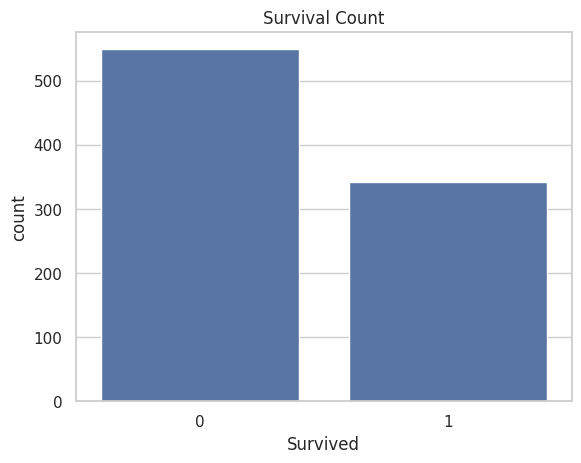

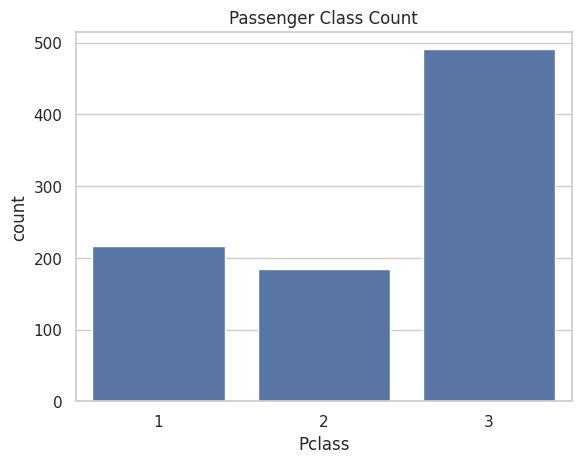

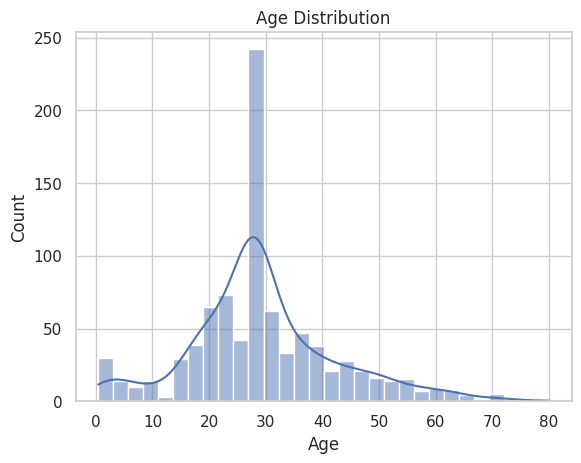

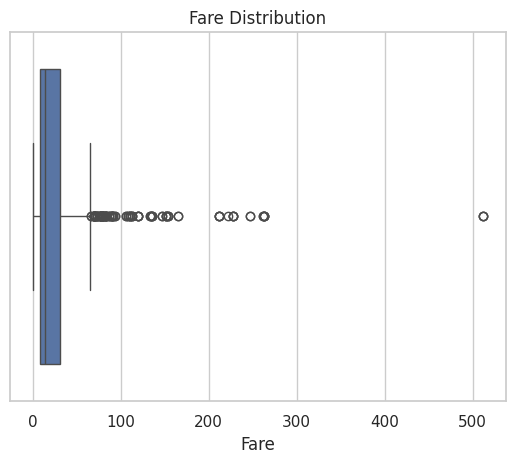

In [5]:
# Univariate Analysis
# Count plots
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Count')
plt.show()

# Distribution of Age
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# Boxplot for Fare
sns.boxplot(x='Fare', data=df)
plt.title('Fare Distribution')
plt.show()


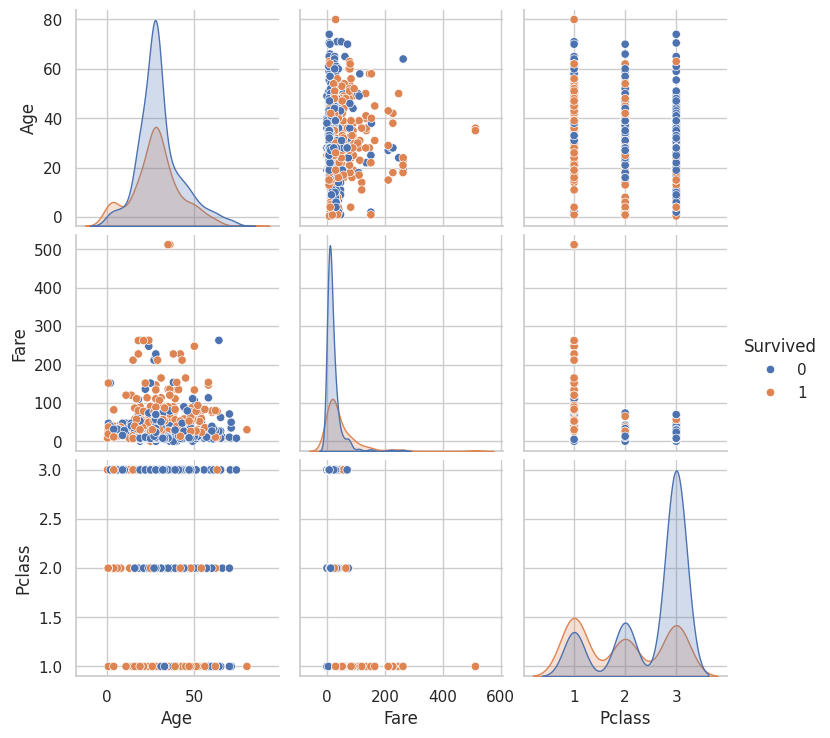

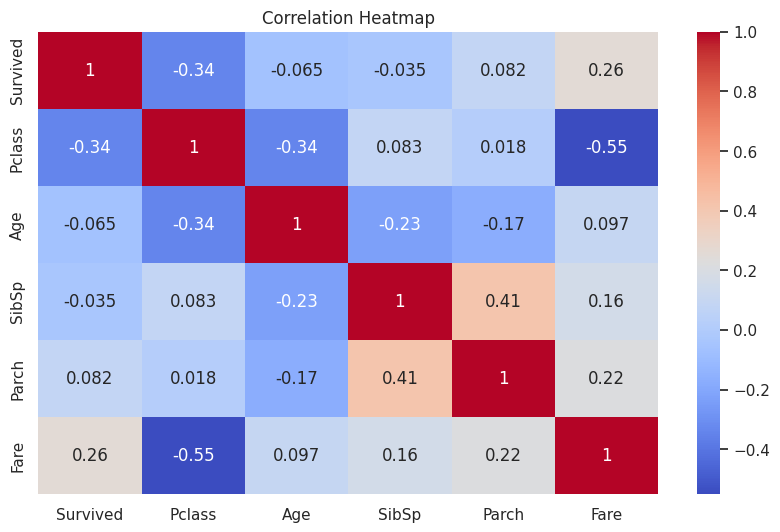

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64


<ipython-input-6-22f4eccf4504>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(['Sex', 'Pclass'])['Survived'].mean())


In [6]:
#Bivariate Analysis
# Pairplot
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass']], hue='Survived')
plt.show()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Groupby survival by Sex and Pclass
print(df.groupby(['Sex', 'Pclass'])['Survived'].mean())


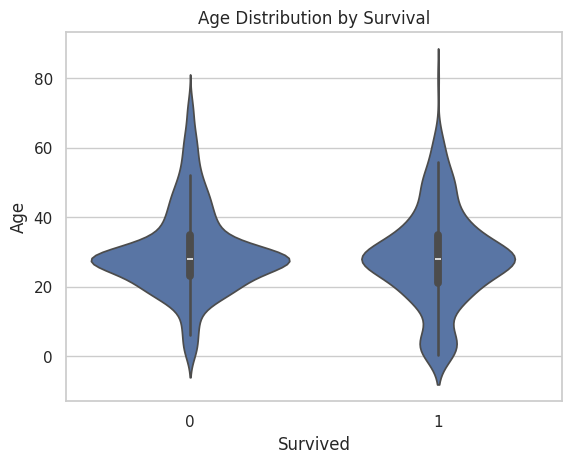

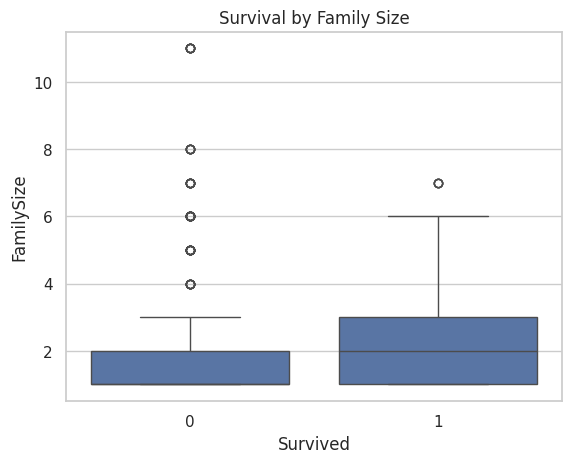

In [7]:
#Bonus: Violin Plot + Feature Engineering
# Violin Plot of Age by Survived
sns.violinplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.show()

# Feature Engineering: FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

sns.boxplot(x='Survived', y='FamilySize', data=df)
plt.title('Survival by Family Size')
plt.show()


In [9]:
#1. Sex is a strong predictor: Females had a significantly higher survival rate.
#2. Pclass matters: First class passengers had higher survival rates.
#3. Younger passengers were more likely to survive.
#4. Larger families (FamilySize > 4) had lower survival rates.
#5. Fare is positively correlated with survival – those who paid more had better chances.
